In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ardi_data = pd.read_csv("Cleaned_1_data.csv")

ardi_data

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,ConditionType,Category,Cause_of_Death,Data_Value_Alt,Effect,ConsumptionPattern,Sex,AgeGroup
0,2015,2019,AL,Alabama,ARDI,Acute,Alcohol-Related Poisonings,Poisoning (not alcohol),134.0,Harmful Effects,Excessive Alcohol Use,Male,Overall
1,2015,2019,AL,Alabama,ARDI,Acute,Alcohol-Related Poisonings,Poisoning (not alcohol),82.0,Harmful Effects,Excessive Alcohol Use,Female,Overall
2,2015,2019,AL,Alabama,ARDI,Acute,Motor Vehicle Traffic Crashes,Motor vehicle traffic crashes,247.0,Harmful Effects,Excessive Alcohol Use,Male,Overall
3,2015,2019,AL,Alabama,ARDI,Acute,Motor Vehicle Traffic Crashes,Motor vehicle traffic crashes,72.0,Harmful Effects,Excessive Alcohol Use,Female,Overall
4,2015,2019,AL,Alabama,ARDI,Acute,Other Acute Causes,Fire injuries,13.0,Harmful Effects,Excessive Alcohol Use,Female,Overall
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,2015,2019,WI,Wisconsin,ARDI,Chronic,"Liver, Gallbladder, and Pancreas","Liver cirrhosis, unspecified",79.0,Harmful Effects,Any Alcohol Use,Male,Overall
2516,2015,2019,WY,Wyoming,ARDI,Chronic,100% Alcohol-Attributable,Alcoholic liver disease,30.0,Harmful Effects,Excessive Alcohol Use,Female,Overall
2517,2015,2019,WY,Wyoming,ARDI,Chronic,100% Alcohol-Attributable,Alcoholic liver disease,57.0,Harmful Effects,Excessive Alcohol Use,Male,Overall
2518,2015,2019,WY,Wyoming,ARDI,Chronic,100% Alcohol-Attributable,Alcoholic liver disease,30.0,Harmful Effects,Any Alcohol Use,Female,Overall


In [3]:
# Age based 1

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# # Load the dataset from ardi_data
# df = pd.read_csv('ardi_data.csv')

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationAbbr','Sex', 'ConditionType', 'Category','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on AgeGroup using SVR
def predict_by_agegroup_svr(age_group):
    df_filtered = ardi_data[ardi_data['AgeGroup'] == age_group]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationAbbr','Sex', 'ConditionType', 'Category','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = SVR(kernel='linear')  # Using a linear kernel for SVR
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
#     model = SVR(kernel='rbf')  # Using RBF kernel for SVR
#     model.fit(X_train, y_train)

#     # Make predictions
#     y_pred = model.predict(X_test)
    
    svr_mse = mean_squared_error(y_test, y_pred)
    svr_mae = mean_absolute_error(y_test, y_pred)
    svr_r2 = r2_score(y_test, y_pred)
    
    return y_pred, svr_mse, svr_mae, svr_r2

# Example prediction using SVR based on AgeGroup
age_group = 'Under 21'

prediction, svr_mse, svr_mae, svr_r2 = predict_by_agegroup_svr(age_group)
print(f"SVR Predicted values for '{age_group}':", prediction)
print("Mean Squared Error (MSE):", svr_mse)
print("Mean Absolute Error (MAE):", svr_mae)
print("R-squared (R2):", svr_r2)


SVR Predicted values for 'Under 21': [26.28684278 19.81200666 20.37490996 20.49700544 21.49552364 17.01306892]
Mean Squared Error (MSE): 887.8926036376755
Mean Absolute Error (MAE): 20.255306432932418
R-squared (R2): -0.2438858127780017


In [4]:
# Age based 2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# # Load the dataset from ardi_data
# df = pd.read_csv('ardi_data.csv')

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationAbbr','Sex', 'ConditionType', 'Category','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on AgeGroup using Gradient Boosting
def predict_by_agegroup_gb(age_group):
    df_filtered = ardi_data[ardi_data['AgeGroup'] == age_group]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationAbbr','Sex', 'ConditionType', 'Category','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = GradientBoostingRegressor()  # Using Gradient Boosting for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return y_pred, mse, mae, r2

# Example prediction using Gradient Boosting based on AgeGroup
age_group = 'Under 21'

prediction, mse, mae, r2 = predict_by_agegroup_gb(age_group)
print(f"Gradient Boosting Predicted values for '{age_group}':", prediction)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Gradient Boosting Predicted values for 'Under 21': [29.10869706 98.06268144 10.60672773 27.71004449 12.98549064 11.44105055]
Mean Squared Error (MSE): 295.6144686553294
Mean Absolute Error (MAE): 13.766956872392461
R-squared (R2): 0.5858613506793844


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationAbbr','Sex', 'ConditionType', 'Category','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on AgeGroup using XGBoost
def predict_by_agegroup_xgb(age_group):
    df_filtered = ardi_data[ardi_data['AgeGroup'] == age_group]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationAbbr','Sex', 'ConditionType', 'Category','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = XGBRegressor()  # Using XGBoost for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    xgboost_mse = mean_squared_error(y_test, y_pred)
    xgboost_mae = mean_absolute_error(y_test, y_pred)
    xgboost_r2 = r2_score(y_test, y_pred)
    
    return y_pred, xgboost_mse, xgboost_mae, xgboost_r2

# Example prediction using XGBoost based on AgeGroup
age_group = 'Under 21'

prediction, xgboost_mse, xgboost_mae, xgboost_r2 = predict_by_agegroup_xgb(age_group)
print(f"XGBoost Predicted values for '{age_group}':", prediction)
print("Mean Squared Error (MSE):", xgboost_mse)
print("Mean Absolute Error (MAE):", xgboost_mae)
print("R-squared (R2):", xgboost_r2)


XGBoost Predicted values for 'Under 21': [26.00011  78.4082   12.001605 23.60446  33.998184 12.219619]
Mean Squared Error (MSE): 357.5179277135512
Mean Absolute Error (MAE): 14.662184397379557
R-squared (R2): 0.49913821077605003


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationAbbr', 'Sex', 'ConditionType', 'Category', 'Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on AgeGroup using Random Forest
def predict_by_agegroup_rf(age_group):
    df_filtered = ardi_data[ardi_data['AgeGroup'] == age_group]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationAbbr', 'Sex', 'ConditionType', 'Category', 'Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor()  # Using RandomForestRegressor for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    rf_mse = mean_squared_error(y_test, y_pred)
    rf_mae = mean_absolute_error(y_test, y_pred)
    rf_r2 = r2_score(y_test, y_pred)
    
    return y_pred, rf_mse, rf_mae, rf_r2

# Example prediction using Random Forest based on AgeGroup
age_group = 'Under 21'

prediction, rf_mse, rf_mae, rf_r2 = predict_by_agegroup_rf(age_group)
print(f"Random Forest Predicted values for '{age_group}':", prediction)
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R2):", rf_r2)


Random Forest Predicted values for 'Under 21': [38.31 81.38 19.17 27.42 29.52 12.05]
Mean Squared Error (MSE): 183.30645
Mean Absolute Error (MAE): 10.838333333333333
R-squared (R2): 0.7431983422189361


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables

label_encoders = {}
categorical_columns = ['LocationAbbr', 'Sex', 'ConditionType', 'Category', 'Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on AgeGroup using Linear Regression
def predict_by_agegroup_linear(age_group):
    df_filtered = ardi_data[ardi_data['AgeGroup'] == age_group]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationAbbr', 'Sex', 'ConditionType', 'Category', 'Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()  # Using Linear Regression for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    linear_mse = mean_squared_error(y_test, y_pred)
    linear_mae = mean_absolute_error(y_test, y_pred)
    linear_r2 = r2_score(y_test, y_pred)
    
    return y_pred, linear_mse, linear_mae, linear_r2

# Example prediction using Linear Regression based on AgeGroup
age_group = 'Under 21'

prediction, linear_mse, linear_mae, linear_r2 = predict_by_agegroup_linear(age_group)
print(f"Linear Regression Predicted values for '{age_group}':", prediction)
print("Mean Squared Error (MSE):", linear_mse)
print("Mean Absolute Error (MAE):", linear_mae)
print("R-squared (R2):", linear_r2)


Linear Regression Predicted values for 'Under 21': [50.44990536 64.76361532 19.36868908 53.02726026 18.86984619 20.86521773]
Mean Squared Error (MSE): 316.54931856275874
Mean Absolute Error (MAE): 14.530019071651049
R-squared (R2): 0.5565328455360816


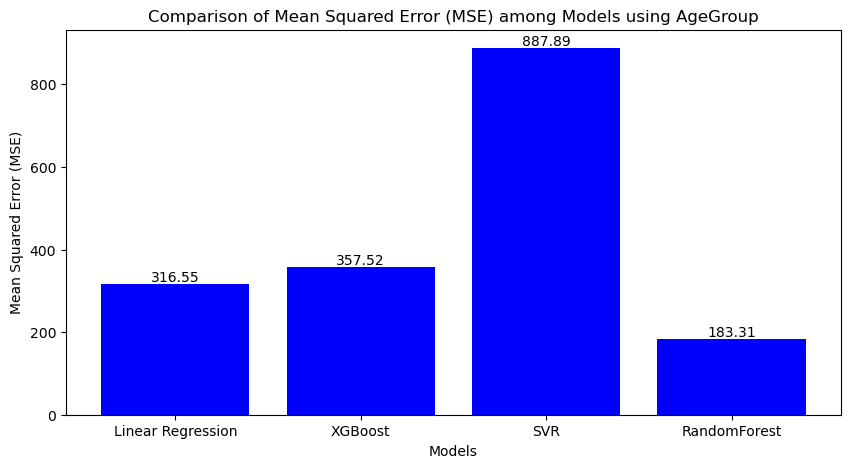

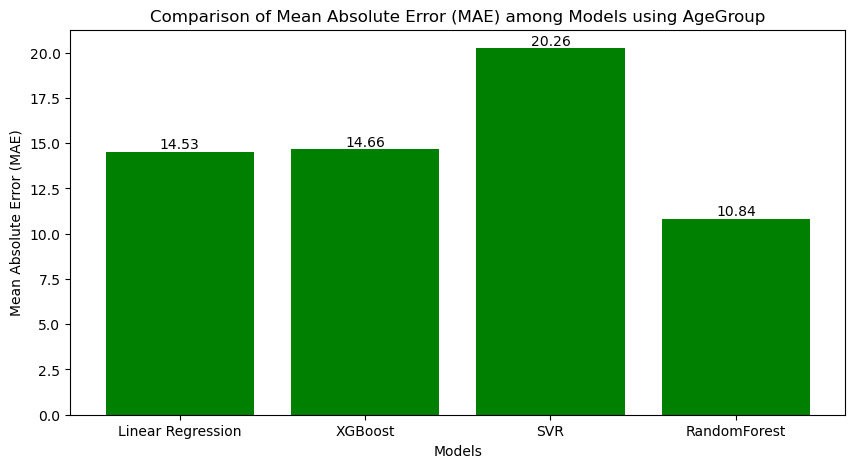

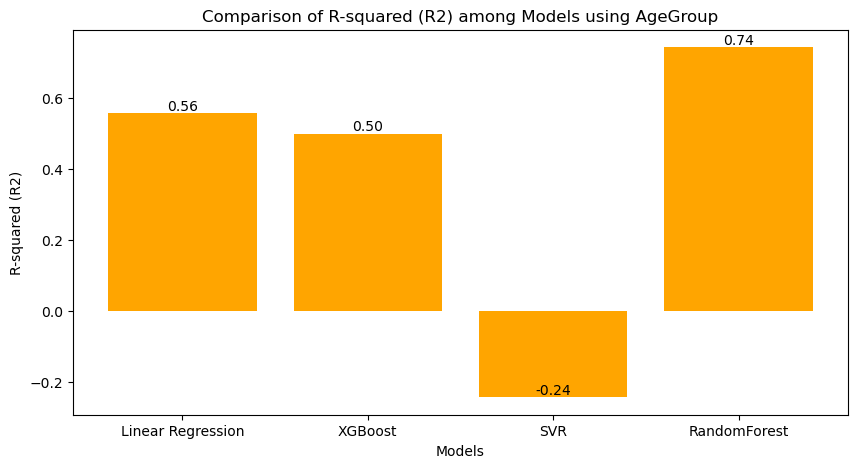

In [8]:
import matplotlib.pyplot as plt

# Create a list of model names and their respective metrics
models = ['Linear Regression', 'XGBoost', 'SVR', 'RandomForest']
mse_scores = [linear_mse, xgboost_mse, svr_mse, rf_mse]
mae_scores = [linear_mae, xgboost_mae, svr_mae,rf_mae]
r2_scores = [linear_r2, xgboost_r2, svr_r2,rf_r2]

# Plot Mean Squared Error (MSE)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, mse_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) among Models using AgeGroup')

# Add annotations to the bars
for bar, mse in zip(bars, mse_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.2f}', ha='center', va='bottom')

plt.show()


# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, mae_scores, color='green')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) among Models using AgeGroup')
# Add annotations to the bars
for bar, mae in zip(bars, mae_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mae:.2f}', ha='center', va='bottom')

plt.show()

# Plot R-squared (R2)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, r2_scores, color='orange')
plt.xlabel('Models')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of R-squared (R2) among Models using AgeGroup')
# Add annotations to the bars
for bar, r2 in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2:.2f}', ha='center', va='bottom')

plt.show()

